In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [23]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [24]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [26]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [27]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())
df.head()

Yes    3204
No     1704
Name: ever_married, dtype: int64
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Female    2897
Male      2011
Name: gender, dtype: int64
Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
never smoked    3335
smoke           1573
Name: smoking_status, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,smoke,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smoke,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,smoke,1


In [28]:
X = df.drop('stroke',axis=1)
y = df["stroke"]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 562.6+ KB
None


In [29]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [30]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [31]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(title+".png")


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)
print(X_train.shape)
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()

numercial_cols = ['age', 'bmi', 'avg_glucose_level']
catergorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep = make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

X_train = data_prep.fit_transform(X_train)
X_test = data_prep.fit_transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(3435, 10)
(3435, 18)
(3435,)
(1473, 18)
(1473,)


In [34]:
from collections import Counter
print(Counter(y_train))
over = SMOTE()
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(Counter(y_train))

Counter({0: 3289, 1: 3289})
(6578, 18)
(6578,)
Counter({0: 3289, 1: 3289})


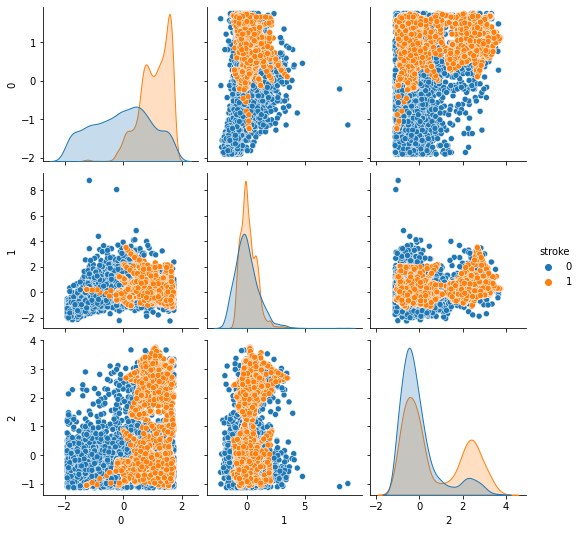

In [15]:
import seaborn as sns
newdf=pd.DataFrame(X_train)
newdf['stroke']=y_train
cols_to_plot = newdf.columns[0:3].tolist() + ['stroke']
sns.pairplot(newdf[cols_to_plot], hue='stroke')

# K-MEANS

In [35]:
from sklearn.cluster import KMeans
def k_means(X, range_n_clusters):
    inertias = []
    for n_cluster in range_n_clusters:
        kmeans = KMeans(n_clusters=n_cluster,random_state=40).fit(X)
        inertias.append(kmeans.inertia_)


    fig, ax = plt.subplots()
    ax.plot(range_n_clusters, inertias, 'o-')
    ax.grid()
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title('Elbow Method')
    plt.show()

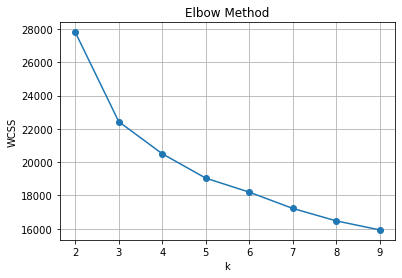

In [36]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_train,range_n_clusters)

# Silhouette

In [37]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def silhouette_plot(X, range_n_clusters, algo_name):
    silhouette_scores=[]
    for n_cluster in range_n_clusters:
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(X)
        sil_coeff = silhouette_score(X, y_pred)
        silhouette_scores.append(sil_coeff)
        print("For n_clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))
        print("-----------------------------------------------------------------------------")

    # plotting the scores against the value of k
    plt.plot(range_n_clusters, silhouette_scores, 'b', label='Silhouette')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    return silhouette_scores

For n_clusters=2, The Silhouette Score is 0.2779508305451819
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.26683607189062325
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.2015324822175192
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.20202659839474024
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.17615327875718403
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.17182073384994861
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.18195820704668125
-----------------------------------------------------------------------------
For n_clusters=9, The 

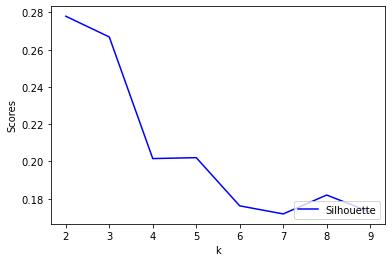

In [38]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_kmeans = silhouette_plot(X_train,range_n_clusters,"k-Means")

# Adjusted Mutual Info

In [39]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def ami_plot(X, range_n_clusters, algo_name):
    adjusted_mutual_info_scores=[]
    for n_cluster in range_n_clusters:
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(X)
        ami_score = adjusted_mutual_info_score(y_train, y_pred)
        adjusted_mutual_info_scores.append(ami_score)
        print("For n_clusters={}, The Adjusted MI Score is {}".format(n_cluster, ami_score))
        print("-----------------------------------------------------------------------------")

    # plotting the scores against the value of k
    plt.plot(range_n_clusters, adjusted_mutual_info_scores, 'g', label='AMI-Score')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    return adjusted_mutual_info_scores

For n_clusters=2, The Adjusted MI Score is 0.07155093145375402
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.1648611640712273
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.12800714245842587
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.13608531652235226
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.1263986259931133
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.11464867145013762
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.10949544363067744
-----------------------------------------------------------------------------
For n_clusters=

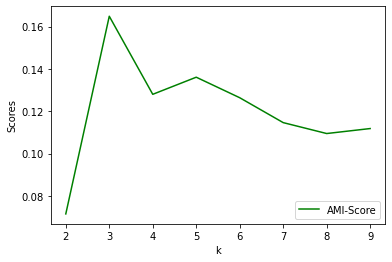

In [40]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_kmeans = ami_plot(X_train,range_n_clusters,"k-Means")

# EMM

In [41]:
from sklearn.mixture import GaussianMixture
def gmm_bic_analysis(X,n_components):
    models = [GaussianMixture(n, covariance_type='full', random_state=40).fit(X)
              for n in n_components]

    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');

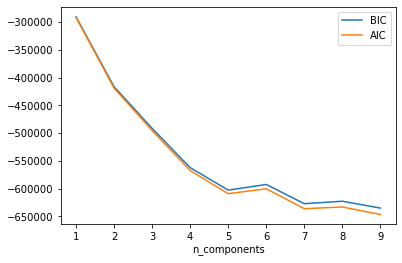

In [43]:
n_components = np.arange(1, 10)
gmm_bic_analysis(X_train,n_components)

For n_clusters=2, The Adjusted MI Score is 0.10911383337096546
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.17188216007110324
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.0770997151171456
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.13258195990045304
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.11482224470493345
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.0833831789979768
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.12322114173655621
-----------------------------------------------------------------------------
For n_clusters=

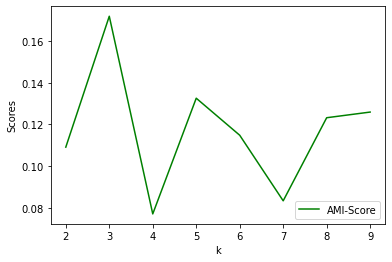

In [44]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_gmm = ami_plot(X_train,range_n_clusters,"GMM")

# PCA

In [45]:
def biplot(score,coeff,variables=None,targets=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    classes = np.unique(targets)
    colors = ['b','silver','y','g']
    for s,l in enumerate(classes):
        plt.scatter(xs[targets==l]* scalex,ys[targets==l] * scaley,s=5, c = colors[s], marker='o') # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if variables is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, variables[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("Component {}".format(1))
    plt.ylabel("Component {}".format(2))
    plt.grid()

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=40)
X_pca_2d=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.33250478 0.16750909]
Total Variance Explained: 50.0


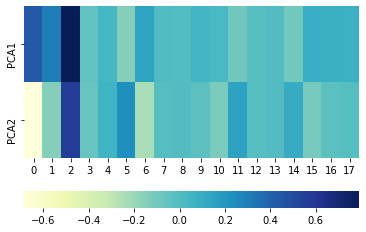

In [47]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=pd.DataFrame(X_train).columns.values,
                 cbar_kws={"orientation": "horizontal"})

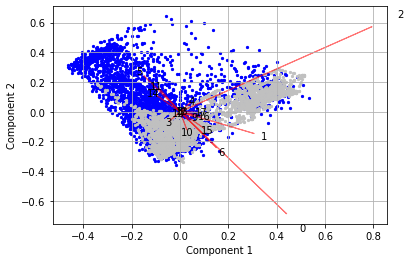

In [48]:
biplot(X_pca_2d[:,0:2],np.transpose(pca.components_[0:2, :]),pd.DataFrame(X_train).columns.values,y_train)
plt.show()

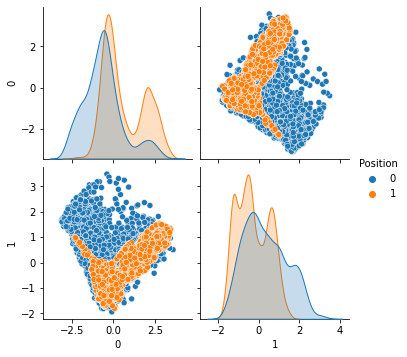

In [49]:
import seaborn as sns
pcaDf = pd.DataFrame(X_pca_2d)
pcaDf['Position']=y_train
sns.pairplot(pcaDf, hue='Position')
plt.show()

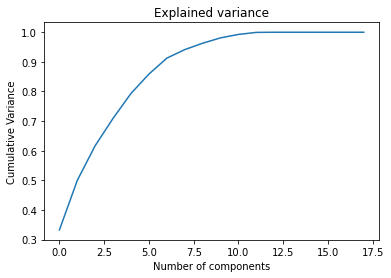

In [50]:
from sklearn.decomposition import PCA
#fitting the pca algorithm with our data
pca=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Explained variance')
plt.show()

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.33250478 0.16750909 0.11726974 0.09228731 0.08391999 0.06527086
 0.05381864 0.02874351]
Total Variance Explained: 94.13


# PCA k-Means

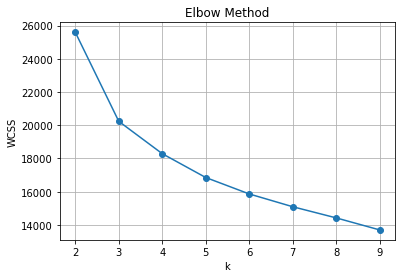

In [52]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_pca,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.2927219798986046
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.28519096609515615
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.2211931231913991
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.2208650822580338
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.21499922822925577
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.18800166132868507
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.17465352222288186
-----------------------------------------------------------------------------
For n_clusters=9, The S

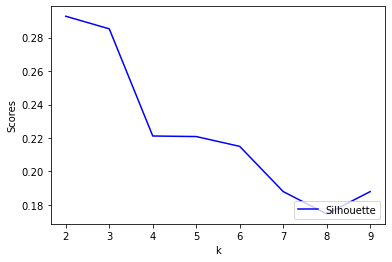

In [53]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_pca_kmeans = silhouette_plot(X_pca,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.07168661245490743
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.16511860558203653
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.12781630200044114
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.136298707996204
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.12216712630400216
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.1136265079118284
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.11976856513225793
-----------------------------------------------------------------------------
For n_clusters=9

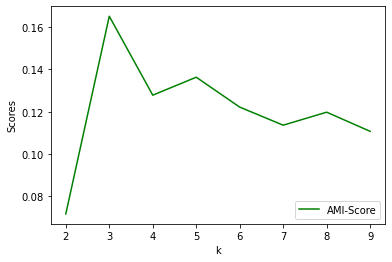

In [54]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_pca_kmeans = ami_plot(X_pca,range_n_clusters,"k-Means")

# PCA EMM

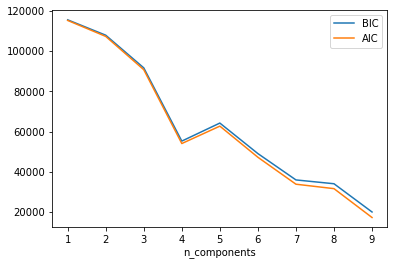

In [56]:
n_components = np.arange(1, 10)
gmm_bic_analysis(X_pca,n_components)

For n_clusters=2, The Adjusted MI Score is 0.07678382511887405
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.1671297823904454
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.13797213460910449
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.12019909735715097
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.11840774489802577
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.12371398671638138
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.08888629713096725
-----------------------------------------------------------------------------
For n_clusters

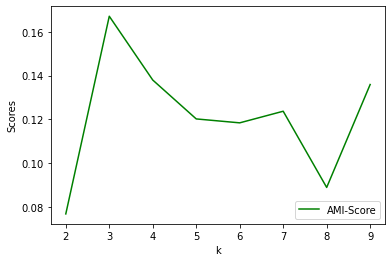

In [57]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_pca_gmm = ami_plot(X_pca,range_n_clusters,"GMM")

# ICA

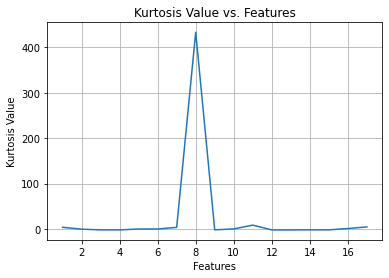

In [58]:
import scipy.stats
from sklearn.decomposition import FastICA
testDf=pd.DataFrame(X_train)
kurtosis_values = []
dims_fifa = list(range(1, 18, 1))
features=[]
for i in dims_fifa:
    kur = scipy.stats.kurtosis(testDf[i])
    kurtosis_values.append(kur)
    if kur>0.5 or kur<-.5:
        features.append(i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Features')
plt.ylabel('Kurtosis Value')
plt.title('Kurtosis Value vs. Features')
plt.grid()
plt.show()

[-0.03672589  0.45365162  0.19544064  0.04383721 -0.04018155 -0.06983335
 -0.04065762  0.02316963  0.03090374  0.05689985  0.16553465  2.69023662
  2.32278348  2.02134866  3.10939936  0.99578566]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


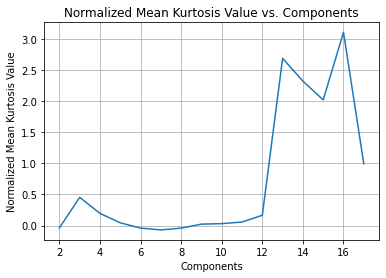

In [59]:
import scipy.stats
from sklearn.decomposition import FastICA
kurtosis_values = []
dims_fifa = list(range(2, 18, 1))
for i in dims_fifa:
    fast_ica = FastICA(n_components = i,random_state=40,max_iter=1000,tol=.001)
    data_ica = fast_ica.fit_transform(X_train)
    #print(fast_ica)
    #kur = scipy.stats.kurtosis(fast_ica.components_.transpose())
    kur = scipy.stats.kurtosis(data_ica)
    #print(kur)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
print(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.title('Normalized Mean Kurtosis Value vs. Components')
plt.grid()
plt.show()


In [61]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(n_components=13, random_state=40,max_iter=1000,tol=.001)
X_ica=fast_ica.fit_transform(X_train)

# ICA k-Means

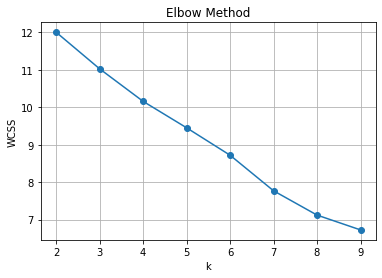

In [62]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_ica,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.15612825931899116
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.1365817253407865
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.1820838616329892
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.12116339857680625
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.14177179591844438
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.17326520431982392
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.18277605360103866
-----------------------------------------------------------------------------
For n_clusters=9, The 

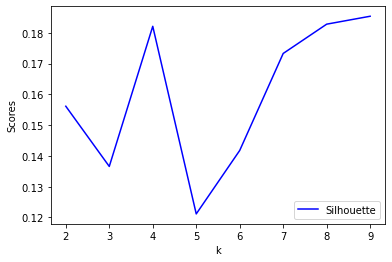

In [65]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_ica_kmeans = silhouette_plot(X_ica,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.09052997265028759
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.061451622948542575
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.08398045335807085
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.056791015061336186
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.11754365038951052
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.08513768907836335
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.06969276198395798
-----------------------------------------------------------------------------
For n_clust

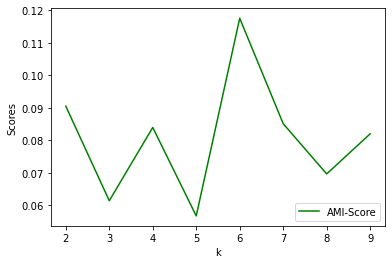

In [66]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_ica_kmeans = ami_plot(X_ica,range_n_clusters,"k-Means")

# ICA EMM

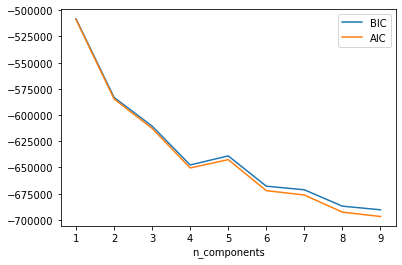

In [68]:
n_components = np.arange(1, 10)
gmm_bic_analysis(X_ica,n_components)

For n_clusters=2, The Adjusted MI Score is -0.00012282410089064168
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.00401694827978693
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.07145687471031173
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.08881820756885275
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.11627839138138632
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.12608112210838174
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.11501394103364211
-----------------------------------------------------------------------------
For n_clu

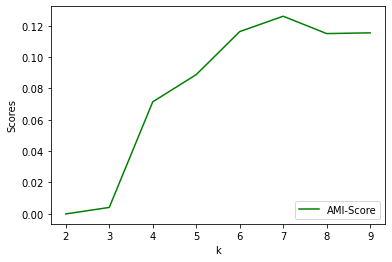

In [69]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_ica_gmm = ami_plot(X_ica,range_n_clusters,"GMM")

# RP

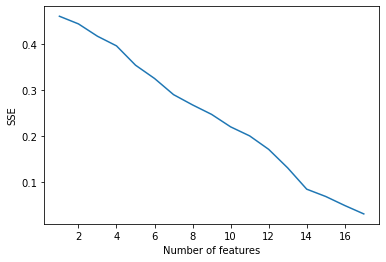

In [70]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
dims_fifa = list(range(1, 18, 1))
sse = dict()
for dim in dims_fifa:
    grp = GaussianRandomProjection(n_components=dim, random_state=40)
    x_prime = grp.fit_transform(X_train)
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    rec_data = np.dot(x_prime, A)
    sse[dim] = mean_squared_error(X_train, rec_data)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of features")
plt.ylabel("SSE")
plt.show()

In [71]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=13, random_state=40)
X_rp = grp.fit_transform(X_train)

# RP k-Means

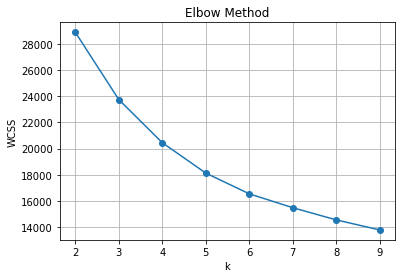

In [72]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_rp,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.2427488530437105
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.21615933096996393
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.21221421791136275
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.21519551803806658
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.2238427176155702
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.2112542627255241
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.2092435172801176
-----------------------------------------------------------------------------
For n_clusters=9, The Si

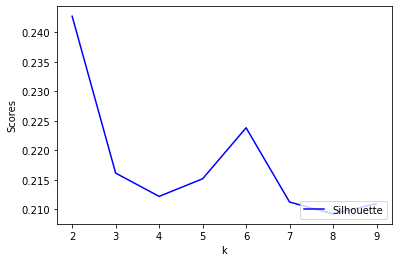

In [73]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_rp_kmeans = silhouette_plot(X_rp,range_n_clusters,"k-Means")

# RP EMM

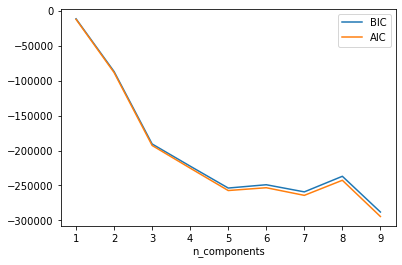

In [74]:
n_components = np.arange(1, 10)
gmm_bic_analysis(X_rp,n_components)

For n_clusters=2, The Adjusted MI Score is 0.0005266669402487461
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.0779673568874406
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.12008055252549507
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.10421587862572801
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.10110436804658611
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.09179385380463437
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.10628830811797066
-----------------------------------------------------------------------------
For n_cluste

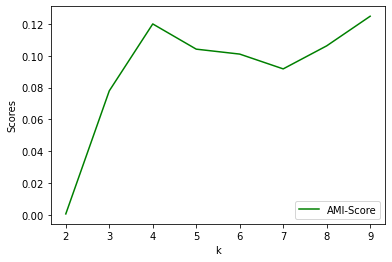

In [75]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_rp_gmm = ami_plot(X_rp,range_n_clusters,"GMM")

# Feature selection ExtraTreesClassifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state=40,n_estimators=100)
clf = clf.fit(X_train, y_train)
etc_model = SelectFromModel(clf, prefit=True)
X_etc= etc_model.transform(X_train)
print(X_etc.shape)

(6578, 6)


# ETC k-Means

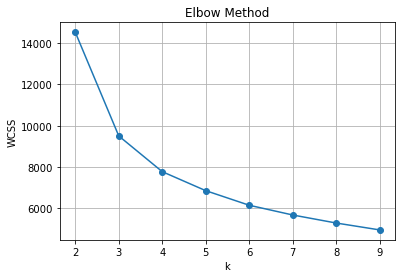

In [77]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_etc,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.42425784103957354
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.4373638195577402
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.36864326288303223
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.3283893863027749
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.28533663156614963
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.28044664933333274
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.2577682800045505
-----------------------------------------------------------------------------
For n_clusters=9, The S

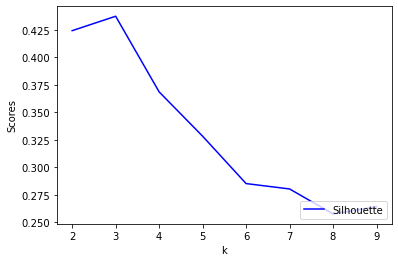

In [78]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_etc_kmeans = silhouette_plot(X_etc,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.071306556576052
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.1645393811467574
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.1572254665889846
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.1590291287673959
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.14829636769059334
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.14603672883672916
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.14150229912371318
-----------------------------------------------------------------------------
For n_clusters=9, 

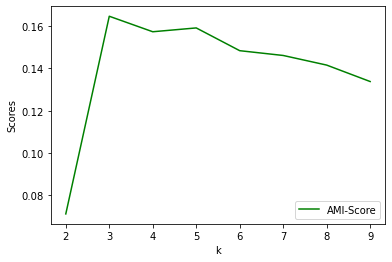

In [79]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_etc_kmeans = ami_plot(X_etc,range_n_clusters,"k-Means")

# ETC EMM

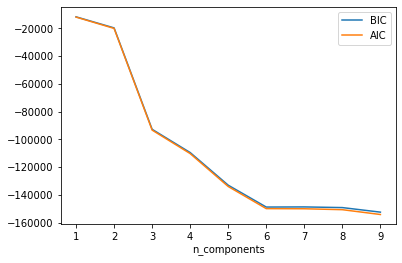

In [80]:
n_components = np.arange(1, 10)
gmm_bic_analysis(X_etc,n_components)

For n_clusters=2, The Adjusted MI Score is 0.07624922146790916
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.23573724814949334
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.1769265555256123
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.1848298516285739
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.1928401390459064
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.18894154461973658
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.1909339287479324
-----------------------------------------------------------------------------
For n_clusters=9,

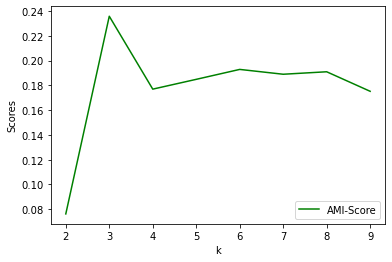

In [81]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_etc_gmm = ami_plot(X_etc,range_n_clusters,"GMM")